<a href="https://colab.research.google.com/github/michellekituku/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Loan Approval Prediction using ML**

#### This project predicts whether a loan application will be *approved or rejected* based on applicant details.  
####It applies classification models like Logistic Regression, Decision Trees, Random Forest, and KNN.

**1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**2. Load dataset**

In [6]:
from google.colab import files
uploaded = files.upload()



Saving LoanApprovalPrediction.csv to LoanApprovalPrediction.csv


In [7]:
df = pd.read_csv("LoanApprovalPrediction.csv")
print("Dataset shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Dataset shape: (598, 13)
    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural    

**3. Exploratory Data Analysis (EDA)**

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


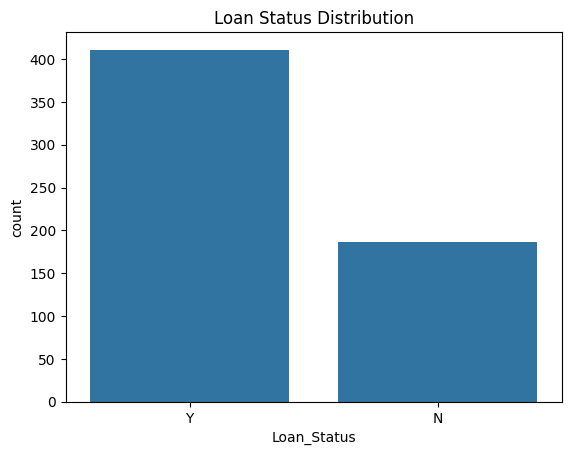

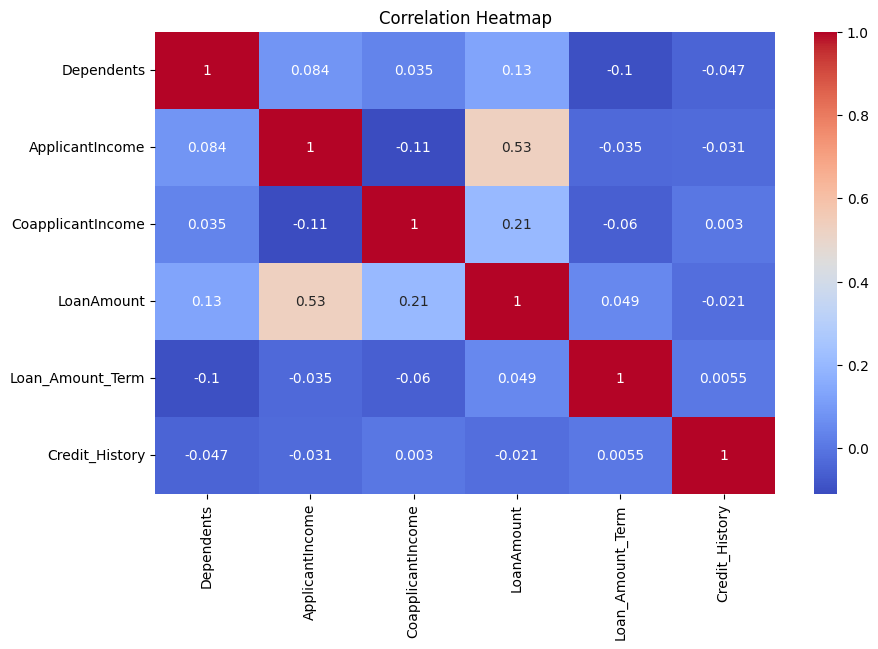

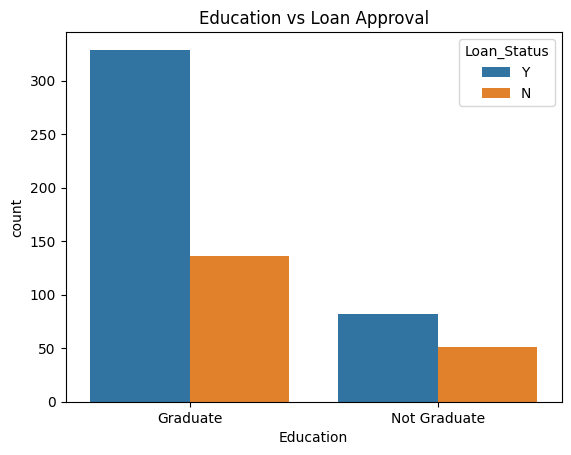

In [8]:
# Missing values
print(df.isnull().sum())

# Distribution of target
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example: categorical feature vs target
sns.countplot(x="Education", hue="Loan_Status", data=df)
plt.title("Education vs Loan Approval")
plt.show()

**4. Data Preprocessing**

In [9]:
# Handle categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Fill missing values (example: with median)
df = df.fillna(df.median(numeric_only=True))

# Define features and target
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**5. Model Training & Evaluation**

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "ROC_AUC": auc}
    print(f"=== {name} ===")
    print("Accuracy:", acc)
    print("ROC_AUC:", auc)
    print(classification_report(y_test, y_pred))
    print("\n")

=== Logistic Regression ===
Accuracy: 0.8083333333333333
ROC_AUC: 0.7114890885750962
              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



=== Decision Tree ===
Accuracy: 0.7166666666666667
ROC_AUC: 0.6585365853658536
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        38
           1       0.78      0.82      0.80        82

    accuracy                           0.72       120
   macro avg       0.67      0.66      0.66       120
weighted avg       0.71      0.72      0.71       120



=== Random Forest ===
Accuracy: 0.8166666666666667
ROC_AUC: 0.7246469833119384
              precision    recall  f1-score   support

           0       0.90      0.47      0.62 

**6. Confusion Matrix for Best Model**

Best Model: Random Forest {'Accuracy': 0.8166666666666667, 'ROC_AUC': np.float64(0.7246469833119384)}


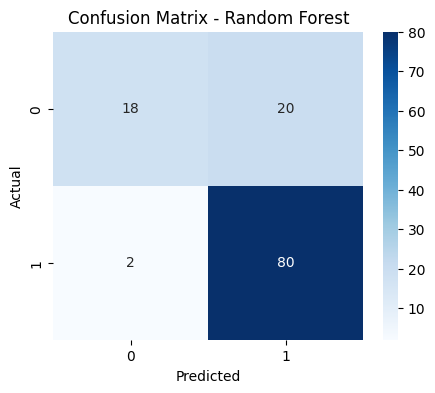

In [11]:
best_model_name = max(results, key=lambda k: results[k]["Accuracy"])
print("Best Model:", best_model_name, results[best_model_name])

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**7. ROC Curve**

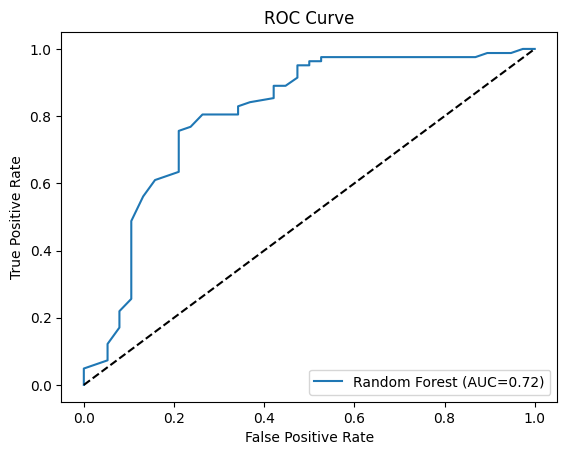

In [12]:
y_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"{best_model_name} (AUC={roc_auc_score(y_test, y_pred_best):.2f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**8. Feature Importance**

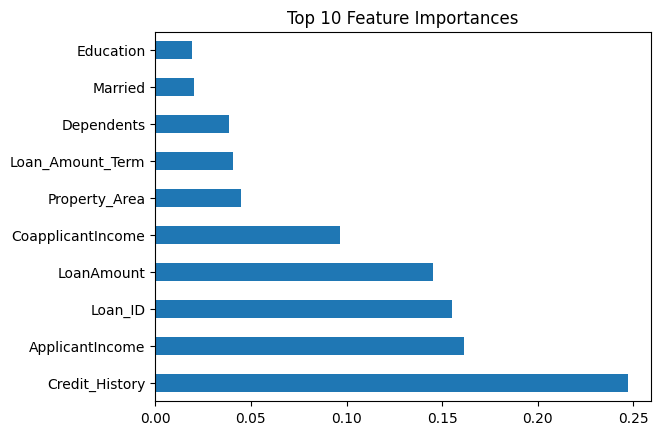

In [13]:
if hasattr(best_model, "feature_importances_"):
    feat_importances = pd.Series(best_model.feature_importances_, index=df.drop("Loan_Status", axis=1).columns)
    feat_importances.nlargest(10).plot(kind="barh")
    plt.title("Top 10 Feature Importances")
    plt.show()